#  Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# Data Visualization

In [2]:
df=pd.read_csv('Data/diabetes.csv')
df.head(11)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.size

6912

In [5]:
df.shape

(768, 9)

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

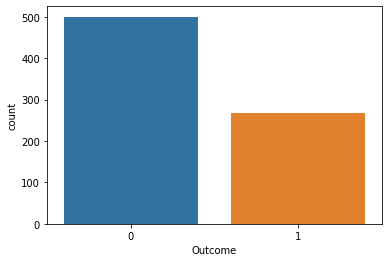

In [8]:
sns.countplot(x = 'Outcome',data = df)

<AxesSubplot:>

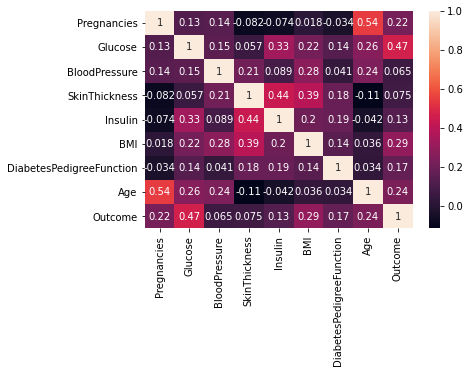

In [9]:
sns.heatmap(df.corr(),annot=True)

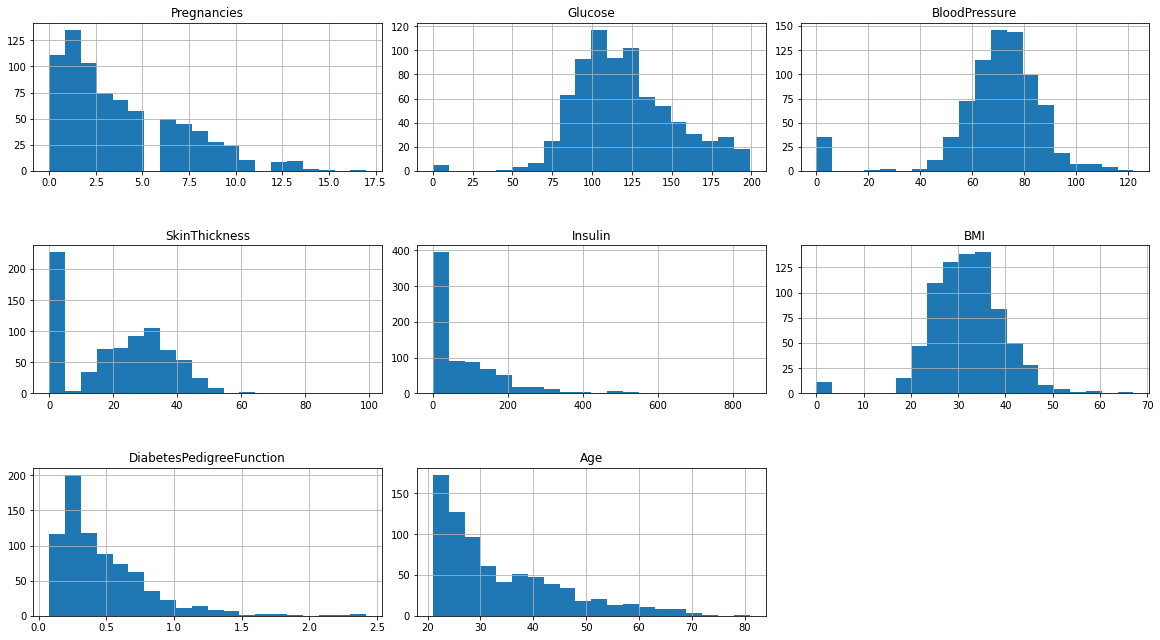

In [10]:
col = df.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    df[i].hist(bins = 20)
    plt.title(i)
plt.show()

# Data Preprocessing

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
features=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
target=df['Outcome']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=2)

# Data Analysis

In [16]:
acc=[]
model=[]

# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
DecisionTree=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
DecisionTree.fit(X_train,y_train)
predicted=DecisionTree.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Decision Tree')
print("Accuracy[Decision Tree]:",x*100)

Accuracy[Decision Tree]: 70.77922077922078


In [19]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       109
           1       0.50      0.56      0.53        45

    accuracy                           0.71       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.72      0.71      0.71       154



In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
score=cross_val_score(DecisionTree,features,target,cv=5)
score

array([0.75324675, 0.66883117, 0.73376623, 0.76470588, 0.73856209])

# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
Naive_Bayes=GaussianNB()
Naive_Bayes.fit(X_train,y_train)
predicted=Naive_Bayes.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Naive Bayes')
print("Accuracy[Naive Bayes]:",x*100)

Accuracy[Naive Bayes]: 75.97402597402598


In [24]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       109
           1       0.60      0.53      0.56        45

    accuracy                           0.76       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.75      0.76      0.76       154



In [25]:
score=cross_val_score(Naive_Bayes,features,target,cv=5)
score

array([0.75324675, 0.72727273, 0.74675325, 0.78431373, 0.74509804])

# Logistic Regression 

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
predicted=logreg.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Logistic Regression')
print("Accuracy[Logistic Regression]:",x*100)

Accuracy[Logistic Regression]: 76.62337662337663


In [28]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       109
           1       0.63      0.49      0.55        45

    accuracy                           0.77       154
   macro avg       0.72      0.68      0.70       154
weighted avg       0.75      0.77      0.76       154



In [29]:
score=cross_val_score(logreg,features,target,cv=5)
score

array([0.77272727, 0.74675325, 0.75974026, 0.81699346, 0.75816993])

# Support Vector Machine 

In [30]:
from sklearn.svm import SVC

In [31]:
SVM=SVC(kernel='poly',random_state=0)
SVM.fit(X_train,y_train)
predicted=SVM.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('SVM')
print('Accuracy[SVM]:',x*100)

Accuracy[SVM]: 79.22077922077922


In [32]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       109
           1       0.70      0.51      0.59        45

    accuracy                           0.79       154
   macro avg       0.76      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154



In [33]:
score=cross_val_score(SVM,features,target,cv=5)
score

array([0.75974026, 0.74025974, 0.77272727, 0.79084967, 0.74509804])

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
RF=RandomForestClassifier(n_estimators=27,criterion='gini',random_state=0)
RF.fit(X_train,y_train)
predicted=RF.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append("Random Forest")
print("Accuracy[Random Forest]:",x*100)

Accuracy[Random Forest]: 77.27272727272727


In [36]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       109
           1       0.61      0.62      0.62        45

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



In [37]:
score=cross_val_score(RF,features,target,cv=5)
score

array([0.74675325, 0.74025974, 0.76623377, 0.81699346, 0.76470588])

# XGBoost

In [38]:
import xgboost as xgb

In [39]:
xb=xgb.XGBClassifier(eval_metric='mlogloss')
xb.fit(X_train,y_train)
predicted=xb.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('XG Boost')
print('Accuracy[XG Boost]:',x*100)

Accuracy[XG Boost]: 72.72727272727273


In [40]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       109
           1       0.53      0.58      0.55        45

    accuracy                           0.73       154
   macro avg       0.67      0.68      0.68       154
weighted avg       0.73      0.73      0.73       154



In [41]:
score=cross_val_score(xb,features,target,cv=5)
score

array([0.73376623, 0.74675325, 0.74025974, 0.78431373, 0.75816993])

# K-Nearest Neighbor

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn_model = KNeighborsClassifier(n_neighbors = 20) 
knn_model.fit(X_train, y_train)
predicted = knn_model.predict(X_test)
x=metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('K-Nearest Neighbor')
print('Accuracy[k-Nearest Neighbor]:',x*100)

Accuracy[k-Nearest Neighbor]: 79.22077922077922


In [44]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       109
           1       0.72      0.47      0.57        45

    accuracy                           0.79       154
   macro avg       0.77      0.70      0.72       154
weighted avg       0.78      0.79      0.78       154



In [45]:
score=cross_val_score(knn_model,features,target,cv=5)
score

array([0.75974026, 0.68181818, 0.74675325, 0.80392157, 0.75163399])

# Accuracy Comparsion

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithms'>

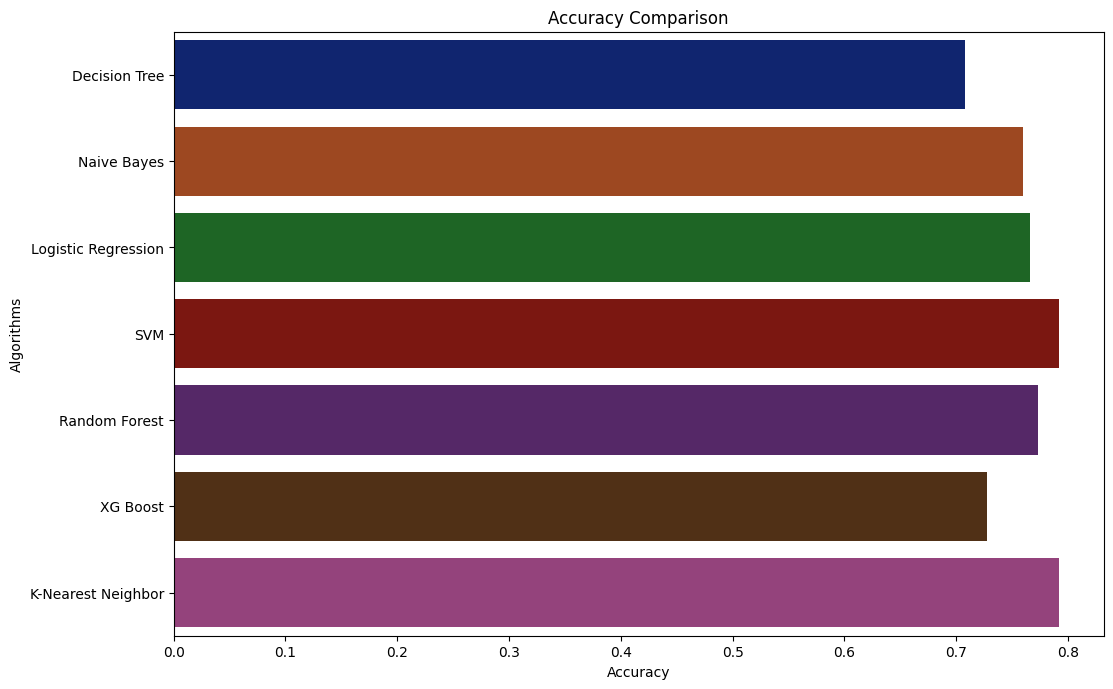

In [46]:
plt.figure(figsize=[12,8],dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x=acc,y=model,palette='dark')

In [47]:
data={'Algorithms':model,'Accuracy':acc}
AC=pd.DataFrame(data)
AC

,Algorithms,Accuracy
0,Decision Tree,0.707792
1,Naive Bayes,0.759740
2,Logistic Regression,0.766234
3,SVM,0.792208
4,Random Forest,0.772727
5,XG Boost,0.727273
6,K-Nearest Neighbor,0.792208


# Building a Model

In [48]:
import pickle
file_name='Diabetes_SVM_Model.pkl'
pkl=open(file_name,'wb')
pickle.dump(SVM,pkl)
pkl.close()